# 머신러닝 - 모델 평가 Part1

주제
- 모델 평가
- 과적합과 과소적합
- 편향과 분산
- 회귀 모델의 평가 지표(MSE, RMSE, MAE, MAPE, R Squared Score)
- 분류 모델의 평가 지표(Accuracy, Precision, Recall, F1-Score, ROC-AUC)

# 예제 실습 - 회귀 모델 평가 지표
- MSE: Mean Squared Error
- RMSE: Root Mean Squared Error
- MAE: Mean Absolute Error
- MAPE: Mean Aboulte Percentage Error 
- R Squared Score: 결정 계수

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# 예시 데이터 feature와 target
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([15, 25, 34, 46, 52, 67, 73, 82, 88, 95])

# 훈련/테스트 분할 (7:3)
X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3, random_state=42
)

# 모델 생성 및 학습
model =LinearRegression() # 모델 생성
model.fit(X_train,y_train)

# 예측
y_pred   = model.predict(X_test)


#테스트 데이터에 대해 이모델이 얼마나 잘 예측을 하는지 모델 평가
#일반화가 잘되었는지(오차가 얼마나 적은지)


# 회귀 평가 지표 계산
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 

print(f"mse: {mse}")
print(f"rmse: {rmse}") 
print(f"mae :{mae}")
print(f"mape :{mape}")
print(f"r2Score: {r2}")

mse: 9.22380158807961
rmse: 3.0370712188026823
mae :2.277227722772281
mape :0.038180743447479175
r2Score 0.9865542250902629


# 예제 실습 - 분류 모델 평가 지표
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

[[89  0]
 [ 3 58]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.95      0.97        61

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Accuracy: 0.9800
Precision: 1.0000
Recall: 0.9508
F1-score: 0.9748
ROC AUC: 0.9913


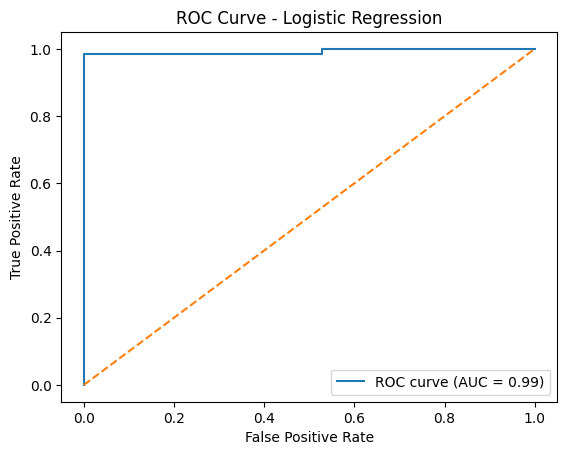

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

# 1. 예제용 이진 분류 데이터 생성
X, y = make_classification(
    n_samples=500,          # 샘플 수
    n_features=5,           # 특성 수
    n_informative=3,        # 실제로 유용한 특성 수
    n_redundant=0,          # 중복 특성 수
    n_clusters_per_class=1, # 클래스당 클러스터 수
    weights=[0.6, 0.4],     # 클래스 불균형 비율 (0: 60%, 1: 40%)
    class_sep=1.5,          # 클래스 간 분리 정도 (클수록 잘 분리 됨)
    random_state=42
)

# 2. 훈련/테스트 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42,stratify=y
)

# 3. 분류 모델 선택 및 학습 (로지스틱 회귀)
model = LogisticRegression()
model.fit(X_train,y_train)

# 4. 예측
y_pred = model.predict(X_test) # 클래스(0/1) 예측
y_proba = model.predict_proba(X_test)[:,1] # 양성(1)일 확률 예측
#why 양성 ?
'''
확률 Threshold와 관련
ROC에서의 TPR과 FPR
*TPR(Sensitivity,Recall,재현율): 실제 양성 중 모델이 양성이라고 예측한 비율
*FPR(1- Specificity,오탐율): 실제로 음성중 모델이 양성이라고 예측한 비율
양성(Positive)이라고 판단한 정도를 Threshold의 변화에 따라 계산
=> 양성에 대한 판단이 필요함 => 양성 예측 확률 
'''



# 5. 평가 지표 계산
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall    = recall_score(y_test,y_pred)
f1        = f1_score(y_test,y_pred)
roc_auc   = roc_auc_score(y_test,y_proba) # 정답이랑 예측확률 값

# 오차 행렬 만들기
cm = confusion_matrix(y_test,y_pred) # 2차원 리스트 형태
# 히트맵으로 오차행렬 출력
print(cm)

# classification_report 출력하기
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# 6. ROC Curve 시각화 (옵션)
fpr, tpr, thresholds = roc_curve(y_test,y_proba)

plt.figure()
# X축: FPR, Y축: TPR
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## 주택 가격 예측 모델 평가 및 비교

캘리포니아 주택 가격 데이터셋을 사용하여 세 가지 회귀 모델(Linear Regression, Decision Tree, Random Forest)의 성능을 비교하세요.

* 데이터셋: `fetch_california_housing.csv`

요구사항

1. 데이터셋을 읽고 구조를 파악하세요.
  - 그리고 데이터를 feature/target으로 분리, 그리고 훈련/테스트 세트로 분할 (8:2)
  - target 변수: `MedHouseVal`
2. 두 가지 모델을 반복문에서 학습/예측을 진행합니다.
  - LinearRegression
  - DecisionTreeRegressor
3. 각 모델에 대해 다음 지표를 계산:
  - MAE (Mean Absolute Error)
  - MSE (Mean Squared Error)
  - RMSE (Root Mean Squared Error)
  - R² Score
4. 각 결과를 저장하고, 마지막에 최종 데이터프레임으로 만들어서 출력합니다.
5. r^2 score 성능이 높은 모델과 RMSE 성능이 제일 높은 모델을 추출하여 출력합니다.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 데이터 로드 및 feature와 target 분리
df = pd.read_csv("fetch_california_housing.csv")
X = df.drop("MedHouseVal", axis=1) 
y = df["MedHouseVal"]

# 데이터 분할
X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

print(f"학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}\n")

# 모델 정의 (key: 모델 이름, value: 모델 객체)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
}

# 결과 저장
results = []

# 각 모델 학습 및 평가
for name, model in models.items():
    
    # 모델 학습
    model.fit(X_train,y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가 지표 계산(MAE, MSE, RMSE, R^2)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    
    # 결과 저장
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    })
    
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# 결과를 DataFrame으로 변환 후 출력
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print(results_df.round(4))

# 위 데이터프레임에서 지표 별 최고 성능 모델 찾기
best_model_r2 = results_df.sort_values(by=["R² Score"],ascending=False).iloc[0].name
print(best_model_r2)
best_model_rmse = results_df.sort_values(by=["RMSE"],ascending=False).iloc[0].name

print(f"R² Score 기준 최고 모델: {best_model_r2} (R²={results_df.loc[best_model_r2, 'R² Score']:.4f})")
print(f"RMSE 기준 최고 모델: {best_model_rmse} (RMSE={results_df.loc[best_model_rmse, 'RMSE']:.4f})")


학습 데이터 크기: (16512, 8)
테스트 데이터 크기: (4128, 8)

MAE: 0.5332
RMSE: 0.7456
R² Score: 0.5758

MAE: 0.4547
RMSE: 0.7037
R² Score: 0.6221

                      MAE     MSE    RMSE  R² Score
Model                                              
Linear Regression  0.5332  0.5559  0.7456    0.5758
Decision Tree      0.4547  0.4952  0.7037    0.6221
Decision Tree
R² Score 기준 최고 모델: Decision Tree (R²=0.6221)
RMSE 기준 최고 모델: Linear Regression (RMSE=0.7456)


## 암 진단 - 모델 성능 비교

유방암 진단 데이터셋을 불러와서 

1. 데이터를 훈련/테스트 데이터로 분할합니다.
2. 분류 모델 3개에 대해서 각각 모델을 생성하고 학습을 진행합니다.
  - Logistic Regression
  - KNN (K=5)
  - Decision Tree (max_depth=3)
3. 각 모델에 대한 다음 지표를 계산하세요.
  - 함수 get_scores() 정의하기
  - 매개변수: y_true: 실제 정답 데이터, y_pred: 모델이 예측한 결과
  - 리턴: 실제 정답과 예측한 결과에 대한 평가지표(Accuracy, Precision, Recall, F1-Score)를 튜플로 묶어서 반환
  - 정의된 함수를 바탕으로 위에서 학습한 모델 3개에 대한 평가 지표 함수를 모두 호출하여 지표를 비교하세요.
4. 성능을 데이터프레임 형태로 정리 후, 출력하세요.
  - 모델 이름, 지표 각각을 컬럼으로 설정 (3행 5열 형태)
5. 어느 지표를 기준으로 평가를 해야 할까요? 기준을 설정하고 해당 지표에 대한 해석

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. 데이터 불러오고, feature와 target으로 분리
data = load_breast_cancer()
X = data.data
y = data.target   # 1 = 양성(Benign), 0 = 악성(Malignant)

# 2. train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 각각의 모델 정의
model_lr = LogisticRegression(max_iter=500)
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()

# 4. 각 모델을 학습
model_lr.fit(X_train,y_train)
model_knn.fit(X_train,y_train)
model_tree.fit(X_train,y_train)

# 5. 각 모델을 예측
pred_lr = model_lr.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_tree = model_tree.predict(X_test)

'''
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall    = recall_score(y_test,y_pred)
f1        = f1_score(y_test,y_pred)
roc_auc   = roc_auc_score(y_test,y_proba) # 정답이랑 예측확률 값
'''

# 6. 지표 계산 함수
def get_scores(y_true, y_pred):
    return (
        accuracy_score(y_true,y_pred),
        precision_score(y_true,y_pred),
        recall_score(y_true,y_pred),
        f1_score(y_true,y_pred)
    )

# 위 함수를 통해 각 모델의 지표를 저장합니다.
lr_scores = get_scores(y_test,pred_lr)
# print(lr_scores)
knn_scores = get_scores(y_test,pred_knn)
tree_scores = get_scores(y_test,pred_tree)

results = [
    ["LogisticRegression"] + list(lr_scores),
    ["KNN"] + list(knn_scores),
    ["DecisionTree"] + list(tree_scores)
]

# 컬럼명
columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]

# DataFrame 생성
df_scores = pd.DataFrame(results,columns=columns)
print(df_scores)

                Model  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.956140   0.945946  0.985915  0.965517
1                 KNN  0.956140   0.934211  1.000000  0.965986
2        DecisionTree  0.938596   0.957143  0.943662  0.950355


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Threshold 변화에 따른 분류 모델 성능 분석

분류 모델은 기본적으로 예측 확률을 threshold(임계값)을 기준으로 분류합니다.
일반적으로 threshold는 0.5로 설정되지만, 실제 문제 상황에 따라 이 값은 크게 달라질 수 있는데,  
threshold를 조절하면 Precision, Recall, F1-Score가 서로 trade-off 관계를 보이며 변합니다.
따라서 threshold를 단순히 0.5로 고정하는 것이 아니라, 문제 목적에 맞는 최적 threshold를 찾아봅시다.

Logistic Regression 모델을 활용하여 threshold 변화에 따른 성능 지표의 변화를 관찰하고, 최적의 threshold를 탐색해봅시다.

1. LogisticRegression 모델을 생성하고 학습 및 '예측 확률(probability)' 계산합니다.
  - 예측 확률 중에서 1일 확률(양성(= 1)일 확률)을 추출합니다. 
2. Threshold 값을 0.1 ~ 0.9까지 변화시키며 성능 측정
  - threshold를 0.1부터 0.9까지 0.05 간격으로 변경한다.
  - 반복문을 통해 각 threshold 기준에 의해 얻은 클래스 예측 결과로 다음 성능 지표를 계산합니다.
    - Precision
    - Recall
    - F1-Score
    - 각 threshold에 대해 계산한 값을 각 지표 리스트로 저장합니다.
3. 성능 지표변화 시각화
  - threshold를 x축으로 하고, Precision, Recall, F1-Score를 y축으로 하여, 한 그래프에 함께 시각화 수행
4. 최적 Threshold 찾기
  - 계산한 F1-Score 리스트 중 가장 높은 값을 갖는 threshold를 찾고 출력 (F1-Score가 가장 높을 때가 Precision/Recall 성능이 제일 좋은 지점)
  - 해당 threshold가 F1 기준으로 가장 적합한 threshold
5. 기본 threshold(0.5)와 최적 threshold의 성능 비교
  - threshold=0.5일 때의 Precision, Recall, F1-Score를 계산
  - 그리고 최적 threshold에서의 성능 지표와 그래프를 비교하여 threshold 조정의 효과를 분석해보세요!

[9.86250847e-01 9.93026870e-01 9.89537561e-01 9.98484349e-01
 9.41704248e-01 2.54384821e-01 7.63939103e-01 4.62959164e-02
 9.22972891e-02 3.64500337e-01 1.31488649e-01 5.67508140e-01
 1.20535003e-01 2.10162871e-02 1.01188404e-01 9.84761381e-01
 9.33928766e-01 2.56690803e-01 4.42768629e-03 2.11022787e-01
 9.34625481e-01 9.93341588e-01 9.04987472e-01 1.44299865e-01
 8.98670184e-01 9.67825740e-01 8.72755242e-01 7.75078966e-01
 9.96277575e-01 1.39072092e-02 9.21099798e-01 3.40740747e-01
 8.63354370e-01 7.95117034e-02 1.93823063e-02 1.20456876e-01
 9.80547299e-03 3.44166193e-01 4.71052360e-02 9.93964749e-02
 9.13514530e-01 1.51894892e-01 9.45434724e-01 1.22126802e-02
 6.77849726e-02 8.16277859e-01 9.99774032e-01 9.86429606e-01
 9.43228514e-01 1.30665618e-03 2.18919077e-01 9.99075446e-01
 7.50495065e-02 9.60786704e-01 4.30196337e-02 8.89262173e-01
 8.54946829e-01 6.02626948e-01 7.01479827e-01 6.17662024e-02
 9.96109262e-01 9.71584331e-01 3.04315336e-03 6.31873656e-01
 4.27384592e-01 3.021722

c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (

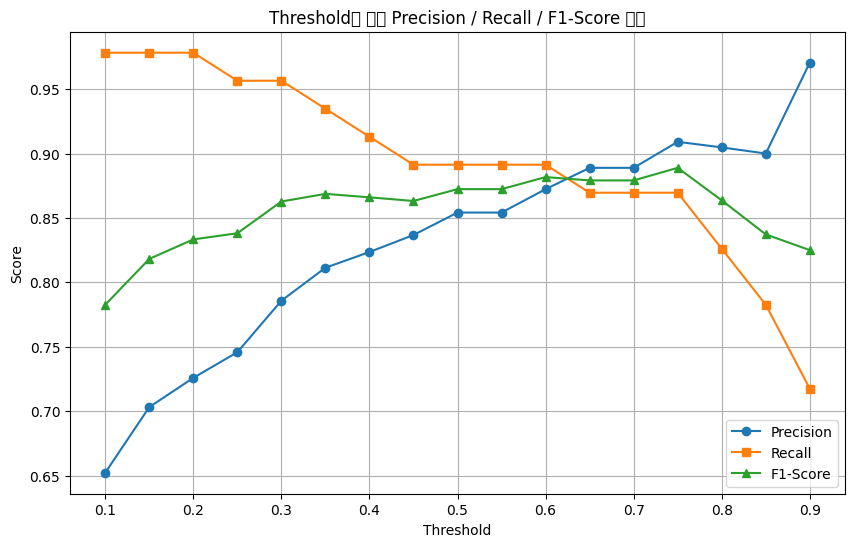

0.7500000000000002
최적 F1-Score: 0.8889, (Threshold = 0.75)
*기본 Threshold (0.5) 성능
Precision: 0.8913
Recall: 0.8542
F1-Score: 0.8723
*최적 Threshold (0.75) 성능
Precision: 0.8696
Recall: 0.9091
F1-Score: 0.8889


In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. LogisticRegression 모델을 학습하고 예측 확률을 구하세요
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train,y_train)
# 양성 클래스(1)에 대한 예측 확률
y_proba =  model.predict_proba(X_test)[:,1] # 모든행에서 1번째 컬럼
print(y_proba)
# 2. threshold를 0.1부터 0.9까지 0.05씩 변화시키면서 지표 계산
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []
f1_scores = []

# 각 threshold에서의 Precision, Recall, F1-Score를 계산 후, 각 리스트에 저장
for thr in thresholds:
    # 양성일 예측 확률이 현재 threshold 이상이면 1, 그렇지 않으면 0 
    y_pred_thr = (y_proba >= thr).astype(int)

    # 현재 threshold로 구한 예측 클래스로 각 지표 계산하기
    p = precision_score(y_test, y_pred_thr, zero_division=0)
    r = recall_score(y_test, y_pred_thr, zero_division=0)
    f1 = f1_score(y_test, y_pred_thr, zero_division=0)

    precisions.append(p)
    recalls.append(r)
    f1_scores.append(f1)

# 3. threshold에 따른 Precision, Recall, F1-Score '변화'를 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='s', label='Recall')
plt.plot(thresholds, f1_scores, marker='^', label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold에 따른 Precision / Recall / F1-Score 변화')
plt.legend()
plt.grid(True)
plt.show()

# 4. F1-Score가 최대가 되는 최적의 threshold를 찾기
best_idx = f1_scores.index(max(f1_scores))  # f1_scores에서 최대가 되는 지점의 인덱스 찾기
best_threshold = thresholds[best_idx]  # 해당 인덱스의 threshold 값
print(best_threshold)
best_f1 = f1_scores[best_idx] # 해당 인덱스의 f1-score 값

print(f"최적 F1-Score: {best_f1:.4f}, (Threshold = {best_threshold:.2f})")

# 5. 기본 threshold(0.5)와 최적 threshold의 성능 비교
# 기본 threshold = 0.5에 대한 예측 클래스를 구하고, 성능 지표 계산하기
# 양성일 예측 확률이 0.5 이상이면 1, 그렇지 않으면 0 
y_pred_default = (y_proba >= 0.5).astype(int)
p_default = precision_score(y_pred_default, y_test, zero_division=0)
r_default = recall_score(y_pred_default, y_test, zero_division=0)
f1_default = f1_score(y_pred_default, y_test, zero_division=0)

# 최적 threshold일 때에 대한 예측 클래스를 구하고, 성능 지표 계산하기
# 양성일 예측 확률이 최적 threshold 이상이면 1, 그렇지 않으면 0 
y_pred_best = (y_proba >= best_threshold).astype(int)
p_best = precision_score(y_pred_best, y_test, zero_division=0)
r_best = recall_score(y_pred_best, y_test, zero_division=0)
f1_best = f1_score(y_pred_best, y_test, zero_division=0)

print("*기본 Threshold (0.5) 성능")
print(f"Precision: {p_default:.4f}")
print(f"Recall: {r_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")

print(f"*최적 Threshold ({best_threshold:.2f}) 성능")
print(f"Precision: {p_best:.4f}")
print(f"Recall: {r_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")


## 잔차(Residual) 분석

회귀 모델의 잔차(residual)를 분석하여 모델의 성능을 시각적으로 평가하세요.

1. make_regression으로 데이터가 생성이 되어있습니다. (n_samples=200, n_features=1, noise=20)
2. Linear Regression 모델로 학습을 진행합니다.
3. 예측을 수행한 다음에 평가 지표를 구하고, 출력합니다.
  - MAE, MSE, RMSE, R^2 Score
4. 잔차(or 오차; Residual)를 계산합니다. y_actual = y_pred + residual
5. 다음 시각화 생성:
  - 실제값 vs 예측값 산점도 (45도 기준선 포함)
  - 잔차 플롯 (예측값 vs 잔차) 0 기준선 포함)
  - 잔차 히스토그램 (잔차 구간의 빈도)
6. 잔차 분석을 하고 출력합니다. (평균, 표준편차, 최대, 최소)
  - numpy 모듈의 mean(), std(), max(), min() 함수를 활용하세요.
7. 최종적으로 3개의 시각화 그래프에 대한 해석을 기준을 참고하여 작성하세요.


[  70.08280437   28.13870421 -120.81106033    8.37759086  -77.09470605
   70.87949568  -23.60284282  -22.78877389 -167.087982   -105.32468046
   23.3786314   -37.40446819  -62.76077564   29.63212349  -89.45543014
 -224.19208636  -46.54518762   33.73179235   18.41906199   43.43811881
   45.41760948    9.97667828  191.94579601   -3.99432878  -56.38388506
   28.06392396  136.53331753   33.71099328  -53.36420255  102.67799225
   59.24556726  -81.87511204  101.31346607 -101.03957739  -17.80944699
   93.89937603  -58.28959352  -44.64928674  -74.50716273 -146.77919929]
모델 평가 지표
MAE: 16.0405
MSE: 437.5499
RMSE: 20.9177
R² Score: 0.9450
[ 13.92949113 -18.96480697   2.95358189   1.71439448  19.51398634
  13.93708385  30.41084999  -0.23263024   3.99328268   2.27608417
  24.46811331   3.34460348 -39.57263226 -32.0762766    7.43394693
   7.28595933  12.93601078  -0.83264328  -3.18369413   6.25923943
  15.6116959  -40.28694257  35.64751246  16.44550436  -1.88659954
   8.95161196 -10.09388112   6.096

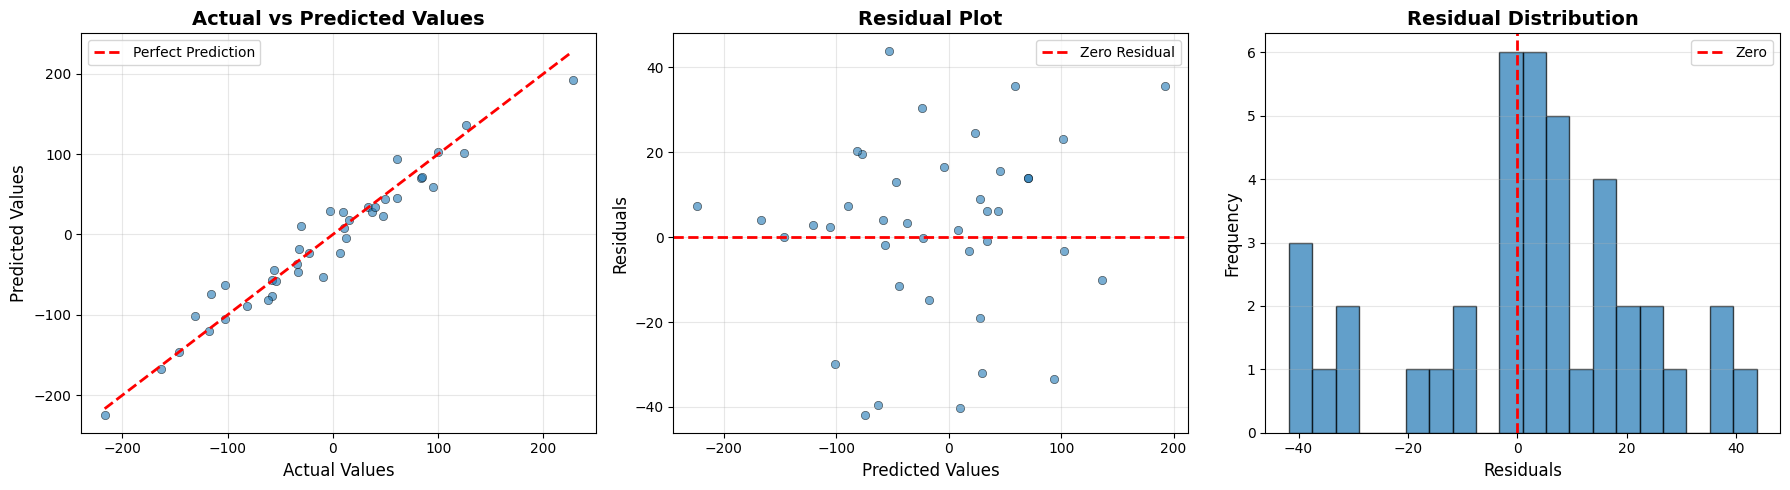

* 잔차 분석
잔차 평균: 1.9560
잔차 표준편차: 20.8260
잔차 최솟값: -41.7906
잔차 최댓값: 43.7231


'\n모델 진단 \n1. 실제값 vs 예측값 그래프\n*해석 방법: 점들이 45도 선 주변에 분포하면 좋은 예측을 의미합니다 (선형 관계 여부)\n분석: 현재 모델은 비교적 좋은 선형 관계를 보입니다\n\n2. 잔차 플롯\n*해석 방법: 잔차가 0을 중심으로 무작위로 분포하면 모델이 적절합니다 (패턴이 보이면 모델이 데이터의 일부 구조를 포착하지 못한 것)\n분석: 현재 잔차는 비교적 균일하게 분포되어 있습니다\n\n3. 잔차 히스토그램\n*해석 방법: 정규분포에 가까우면 모델의 가정이 만족됩니다\n분석: 현재 잔차는 0을 중심으로 종 모양 분포를 보입니다\n'

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 생성
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 생성 및 학습 
model = LinearRegression()
model.fit(X_train,y_train)

# 예측 수행하기
y_pred = model.predict(X_test)
print(y_pred)

'''
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
'''

# 평가 지표 계산(MAE, MSE, RMSE, R^2 Score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("모델 평가 지표")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# 잔차 계산하기 (y_actual = y_predicted + residuals)  abs: 절대값
residuals = y_test - y_pred
print(residuals)
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 서브 플롯

# 1. 실제값(actual) vs 예측값(predicted)에 대한 산점도
axes[0].scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)

axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# # 2. 잔차 Plot (X축: 예측값, Y축: 잔차에 대한 산점도)
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Residual')
axes[1].set_xlabel('Predicted Values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# # 3. 잔차 히스토그램(잔차에 대한 빈도/분포 확인. 구간은 20개로 설정)
axes[2].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[2].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero')
axes[2].set_xlabel('Residuals', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# # 잔차 분석하기 (평균, 표준편차, 최소, 최대)
print("* 잔차 분석")
print(f"잔차 평균: {np.mean(residuals):.4f}")
print(f"잔차 표준편차: {np.std(residuals):.4f}")
print(f"잔차 최솟값: {np.min(residuals):.4f}")
print(f"잔차 최댓값: {np.max(residuals):.4f}")

'''
모델 진단 
1. 실제값 vs 예측값 그래프
*해석 방법: 점들이 45도 선 주변에 분포하면 좋은 예측을 의미합니다 (선형 관계 여부)
분석: 현재 모델은 비교적 좋은 선형 관계를 보입니다

2. 잔차 플롯
*해석 방법: 잔차가 0을 중심으로 무작위로 분포하면 모델이 적절합니다 (패턴이 보이면 모델이 데이터의 일부 구조를 포착하지 못한 것)
분석: 현재 잔차는 비교적 균일하게 분포되어 있습니다

3. 잔차 히스토그램
*해석 방법: 정규분포에 가까우면 모델의 가정이 만족됩니다
분석: 현재 잔차는 0을 중심으로 종 모양 분포를 보입니다
'''

## ROC Curve와 임계값 최적화

ROC Curve를 그리고 최적의 임계값(threshold)을 찾아 모델 성능을 개선하세요.
요구사항

1. make_classification으로 불균형 데이터가 생성이 되어있습니다. (`weights=[0.9, 0.1]`)
  - 구조 파악 및 훈련/테스트 데이터셋으로 분할하세요(7:3), (stratify=y)
2. Logistic Regression 모델을 만들고 학습을 진행하세요.
  - 예측을 진행하는데 '예측 확률(probability)'에 대해 양성(1)일 확률만 추출합니다.
3. ROC Curve 그리기 (AUC 값 표시)
  - roc_curve와 roc_auc_score 함수를 활용하여 결과를 저장합니다.
4. 임계값을 0.1 ~ 0.9까지 변경하면서: Precision, Recall, F1-Score 계산 결과를 비교
5. F1-Score가 최대가 되는 최적 임계값 찾습니다.
6. 기본 임계값(0.5)과 최적 임계값의 성능 비교
  - 0.5일 때의 예측 결과와 최적의 임계값일 때의 예측 결과를 각각 지표(Precision, Recall, F1-Score)를 데이터프레임 형태로 정리합니다.
  - 기본 임계값일 때의 Confusion Matrix을 만들고 FN(놓친 양성)을 출력합니다.
  - 최적의 임계값일 때의 Confusion Matrix을 만들고 FN(놓친 양성)을 출력합니다.
7. 최종적으로 결과에 대한 시각화를 진행합니다.
  - ROC 커브를 시각화합니다. 
  - Threshold 변화에 따른 Precision/Recall/F1-Score의 변화를 하나의 그래프에 그립니다.
    - 추가로, 기본 임계값(0.5)일 때의 수직선, 최적의 임계값일 때의 수직선을 추가합니다.
9. 결과를 확인하고 분석해보세요!

데이터 크기: (1000, 20)
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95]
최적 임계값: 0.25
최대 F1-Score: 0.5278
해당 Precision: 0.4524
해당 Recall: 0.6333
   Threshold  Precision    Recall  F1-Score
0       0.50   0.571429  0.400000  0.470588
1       0.25   0.452381  0.633333  0.527778
*기본 임계값 (0.5) Confusion Matrix:
[[261   9]
 [ 18  12]]
FN (놓친 양성): 18
*최적 임계값 (0.25) Confusion Matrix:
[[247  23]
 [ 11  19]]
FN (놓친 양성): 11


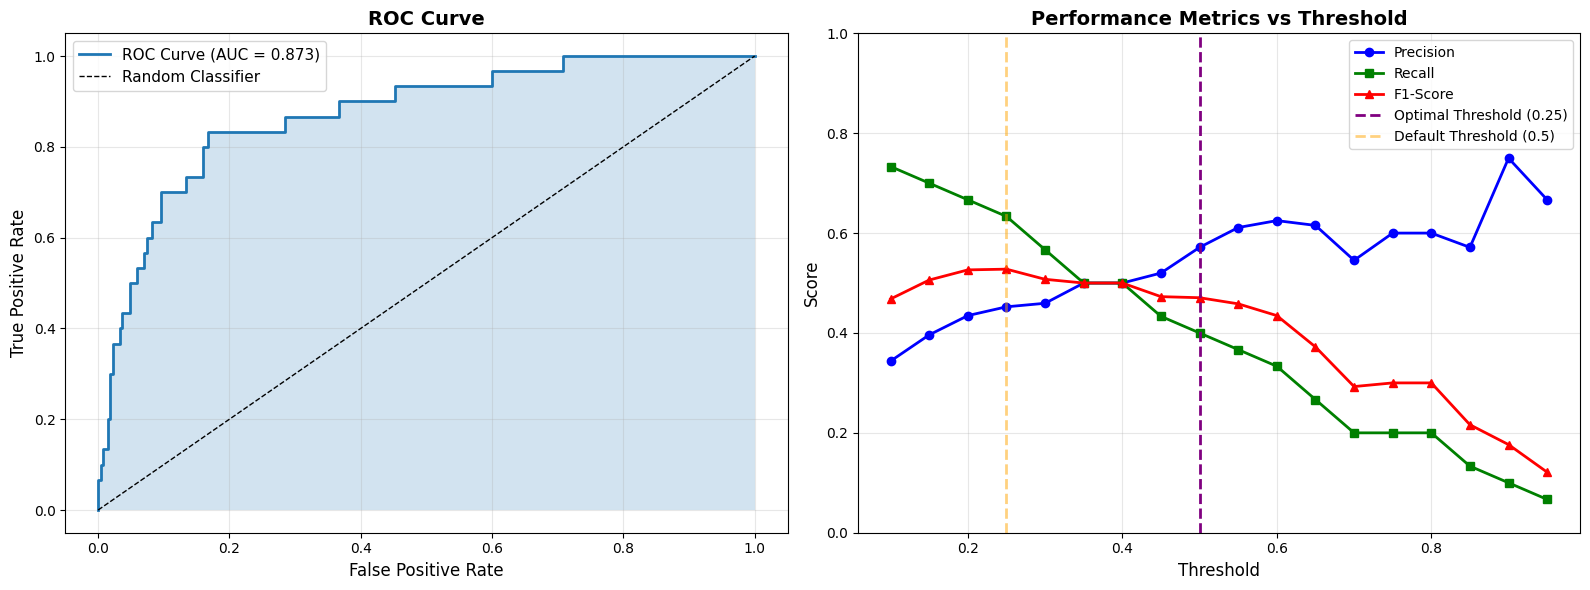

'\n1. ROC Curve 해석 (AUC가 1에 가까울수록 좋은 모델)\n분석: \n\n2. 임계값 최적화\n분석:\n'

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 불균형 데이터 생성 및 구조 확인
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_classes=2,
    weights=[0.9, 0.1],  # 10% 양성, 90% 음성
    random_state=42
)
print(f"데이터 크기: {X.shape}")

# 1. 데이터 분할 (7:3), stratify=y 옵션 추가
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 2. 모델 학습
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train,y_train)

# 양성(1)일 예측 확률 구하기
y_prob = model.predict_proba(X_test)[:,1]
# print(y_prob)
# ROC Curve 계산 (정답과 예측 확률로 평가)
fpr, tpr, thresholds_roc = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test,y_prob)

# 임계값별 성능 계산
thresholds = np.arange(0.1, 1.0, 0.05) # 0.1부터 1.0 사이를 0.05 변화하면서
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    # 현재 threshold를 기준으로 했을 때의 성능 지표
    y_pred_threshold = (y_prob >= threshold).astype(int) # threshold 기준에 따른 클래스 예측

    # 그에 따른 각 지표 계산 및 각 리스트에 저장
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

print(thresholds)

# 최적 임계값 찾기 (f1-score가 제일 높을 때)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
max_f1 = np.max(f1_scores)

# print("*임계값 최적화 결과")
print(f"최적 임계값: {optimal_threshold:.2f}")
print(f"최대 F1-Score: {max_f1:.4f}")
print(f"해당 Precision: {precision_scores[optimal_idx]:.4f}")
print(f"해당 Recall: {recall_scores[optimal_idx]:.4f}")

# # 기본 임계값(0.5)과 최적 임계값 비교
default_pred = (y_prob >= 0.5).astype(int)
optimal_pred = (y_prob >= optimal_threshold).astype(int)

# # 기본 임계값 (0.5) vs 최적 임계값마다의 지표 성능 비교 데이터프레임
comparison_df = pd.DataFrame({
    'Threshold': [0.5, optimal_threshold], # 0.5와 최적의 threshold
    'Precision': [
        precision_score(y_test, default_pred),
        precision_score(y_test, optimal_pred)
    ],
    'Recall': [
        recall_score(y_test, default_pred),
        recall_score(y_test, optimal_pred)
    ],
    'F1-Score': [
        f1_score(y_test, default_pred),
        f1_score(y_test, optimal_pred)
    ]
})

print(comparison_df)

# # 각 임계값에 따른 Confusion Matrix 비교
cm_default = confusion_matrix(y_test, default_pred)
cm_optimal = confusion_matrix(y_test, optimal_pred)

# # 각 Confusion Matrix에서 FN을 추출하세요
print("*기본 임계값 (0.5) Confusion Matrix:")
print(cm_default)
print(f"FN (놓친 양성): {cm_default[1][0]}")

print(f"*최적 임계값 ({optimal_threshold:.2f}) Confusion Matrix:")
print(cm_optimal)
print(f"FN (놓친 양성): {cm_optimal[1][0]}")

# # 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # 1. ROC Curve 그리기
# # X축: FPR, Y축: TPR
axes[0].plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].fill_between(fpr, tpr, alpha=0.2)
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# # 2. Threshold에 따른 지표 변화
# # 2-1. 각 지표
axes[1].plot(thresholds, precision_scores, 'b-', linewidth=2, label='Precision', marker='o')
axes[1].plot(thresholds, recall_scores, 'g-', linewidth=2, label='Recall', marker='s')
axes[1].plot(thresholds, f1_scores, 'r-', linewidth=2, label='F1-Score', marker='^')
# 2-2. 기준 threshold(0.5와 최적)에 대한 수직선
axes[1].axvline(x=0.5, color='purple', linestyle='--', 
                linewidth=2, label=f'Optimal Threshold ({optimal_threshold:.2f})')

axes[1].axvline(optimal_threshold, color='orange', linestyle='--', 
                linewidth=2, alpha=0.5, label='Default Threshold (0.5)')

axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Performance Metrics vs Threshold', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

'''
1. ROC Curve 해석 (AUC가 1에 가까울수록 좋은 모델)
분석: 

2. 임계값 최적화
분석:
'''

## KNN - 와인 품질

배경: 와인의 화학적 특성을 기반으로 와인의 품질을 분류하는 KNN 모델을 만드세요.

1. 데이터셋을 읽어오고, 기본적인 구조를 확인합니다.
2. feature와 target을 분리합니다. 
  - feature: 'Alcohol', 'Acidity', 'Sugar', 'pH'
  - target: 'Quality'
3. 스케일링 없을 때, StandardScaler 적용했을 때, MinMaxScaler 적용했을 때의 정확도를 비교합니다.
  - 3가지 경우에 대해 각각 훈련/테스트 데이터 분할과 K=5의 모델 생성/학습 진행
  - scaling_comparison 변수에 스케일링 방법과 정확도를 기록합니다.
4. 1부터 19까지의 K를 반복하여 최적의 K를 찾습니다.
  - 각 K에 대해 모델을 생성/학습을 진행
  - k_results에다가 현재 k값과 훈련 정확도, 테스트 정확도를 기록합니다. 
  
5. 테스트 성능이 제일 높은 최적의 K로 거리 측정 방식에 따라서 KNN 모델을 학습합니다.
  - 거리 측정(metric 매개변수): 유클리드 거리, 맨해튼 거리
  - 학습과 예측을 진행한 뒤, y_test와 y_pred에 대한 분류 평가 지표를 기록합니다.
  - Accuracy, Precision, Recall, F1-score
  - 기록한 결과를 데이터프레임 형태로 만들어서 출력하세요.


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was pas

          Scaling  Accuracy
0            None  0.991667
1  StandardScaler  0.991667
2    MinMaxScaler  0.991667


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was pas

     k  train_accuracy  test_accuracy
0    1        1.000000       0.991667
1    2        0.975000       0.991667
2    3        0.977083       0.983333
3    4        0.970833       0.991667
4    5        0.972917       0.991667
5    6        0.979167       1.000000
6    7        0.977083       0.991667
7    8        0.975000       0.991667
8    9        0.975000       0.991667
9   10        0.977083       1.000000
10  11        0.979167       1.000000
11  12        0.981250       1.000000
12  13        0.981250       1.000000
13  14        0.983333       1.000000
14  15        0.981250       1.000000
15  16        0.983333       1.000000
16  17        0.983333       1.000000
17  18        0.983333       1.000000
18  19        0.981250       1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:89: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.grid(True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:89: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.grid(True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:89: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.grid(True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.grid(True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.grid(True)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from

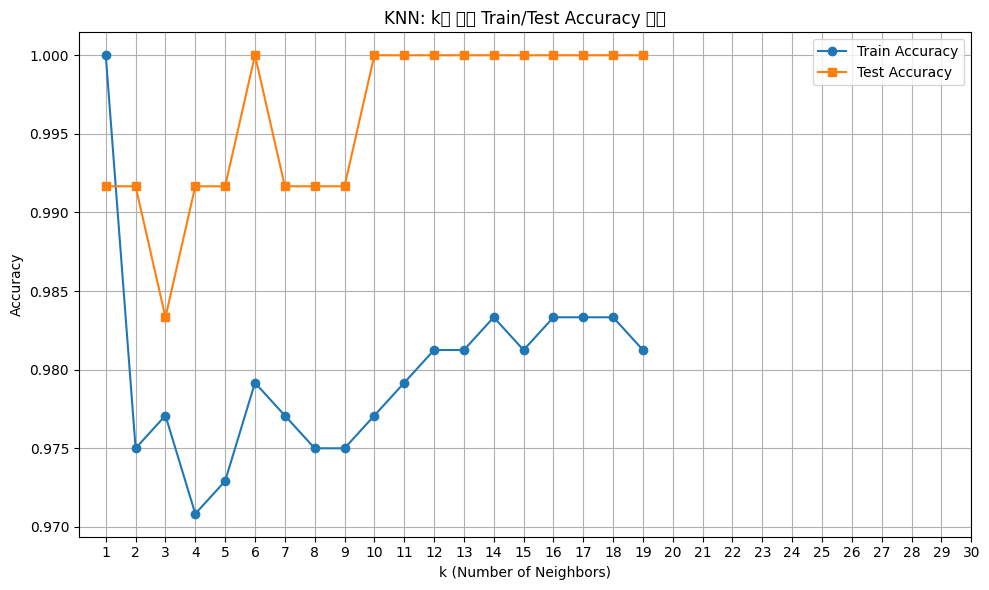

test_accuracy    1.0
dtype: float64
1


C:\Users\USER\AppData\Local\Temp\ipykernel_20880\2771212881.py:95: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(best_k_row)
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got None instead.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터셋을 읽고, 기본 구조를 확인하세요.
df = pd.read_csv("wine_quality.csv")
# 2. feature와 target을 분리하세요:
X = df[["Alcohol","Acidity","Sugar","pH"]]
y = df[["Quality"]]

# 스케일링 없이, StandardScaler 적용, MinMaxScaler 적용한 세 가지 경우의 정확도를 비교하세요:
scaling_comparison = [] # 3가지 경우에 대한 정확도를 기록하는 리스트

# # 2-1. 스케일링 없음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
scaling_comparison.append({
    'Scaling': 'None',
    'Accuracy': accuracy_score(y_test, y_pred)
})

# # 2-2. StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train) # 모델 학습

scaling_comparison.append({
    'Scaling': 'StandardScaler',
    'Accuracy': accuracy_score(y_test, y_pred)
})

# # 2-3. MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)# 모델 학습
 
scaling_comparison.append({
    'Scaling': 'MinMaxScaler',
    'Accuracy': accuracy_score(y_test, y_pred)
})

# # 2-4. 결과를 데이터프레임으로 만들고 출력하기
comparison_df = pd.DataFrame(scaling_comparison)
print(comparison_df)

# # 3. 최적의 K 찾기
k_results = [] # 결과를 저장하는 리스트(k값, 훈련 정확도, 테스트 정확도)

for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k) # 모델 생성
    model.fit(X_train,y_train) # 모델 학습(X_train과 y_train으로)

    # 결과 저장
    k_results.append({
        'k': k,
        'train_accuracy': accuracy_score(y_train,model.predict(X_train)),
        'test_accuracy': accuracy_score(y_test,model.predict(X_test))
    })

# # 3-2. 결과를 데이터프레임으로 만들고 출력하기
k_df = pd.DataFrame(k_results)
print(k_df)

# # 3-3. k의 변화에 따른 학습/테스트 정확도를 같은 그래프에 선그래프로 그리세요
plt.figure(figsize=(10, 6))
plt.plot(k_df["k"], k_df["train_accuracy"], marker='o', label='Train Accuracy')
plt.plot(k_df["k"], k_df["test_accuracy"], marker='s', label='Test Accuracy')

plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN: k에 따른 Train/Test Accuracy 변화')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # 3-4. 위 결과에서 테스트 정확도가 가장 높을 때의 최적의 k를 추출하세요
best_k_row = k_df[["test_accuracy"]].max()
print(best_k_row)
best_k = int(best_k_row)
print(best_k)
# # 4. 최적 k 값으로 다양한 거리 측정 방식을 비교하세요:
metric_results = [] # 거리 측정 방식에 따른 정확도 저장 리스트
for metric in ['euclidean', 'manhattan']: # 유클리드, 맨해튼
    
    # KNN 모델을 생성하고 학습과 예측을 진행하세요!
    # n_neighbors: 최적의 k, metric: 거리 측정 방식
    model = KNeighborsClassifier(n_neighbors=best_k)
    
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    
#     # 거리 측정 방식에 따른 성능지표(Accuracy, Precision, Recall, F1-Score)를 저장하세요
    metric_results.append({
        'Metric': metric,
        'Accuracy': accuracy_score(None, y_pred),
        'Precision': precision_score(None, None, average='weighted'),
        'Recall': recall_score(None, None, average='weighted'),
        'F1': f1_score(None, None, average='weighted')
    })

# # 4-1. 결과를 데이터 프레임으로 만들고 결과를 출력하세요.
metrics_df = pd.DataFrame(None)
print(metrics_df)